In [ ]:
import numpy as np

In [ ]:
def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevanz score < k')
    return np.mean(r)

In [ ]:
def average_precision(r):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)

In [ ]:
def mean_average_precision(rs):
    return np.mean([average_precision(r) for r in rs])

In [ ]:
test1 = [[1, 1, 0, 1, 0], [0, 0, 1, 1, 1]] # BA Beispiel
test2 = [[1, 1, 1, 1, 1], [0, 0, 0, 0, 0]]
test3 = [[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]
test4 = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


print(mean_average_precision(test1))
print(mean_average_precision(test2))
print(mean_average_precision(test3))
print(mean_average_precision(test4))

In [ ]:
from flask import Flask, json, request

In [ ]:

def json_response(payload, status=200):
    return (json.dumps(payload), status, {'content-type': 'application/json'})

In [ ]:
jsonTest = {'0': [{'score': 60.9176157115223, 'rating': 1, 'ranking': 0}, {'score': 57.875198563054134, 'rating': 1, 'ranking': 1}, {'score': 57.875198563054134, 'rating': 0, 'ranking': 2}, {'score': 57.875198563054134, 'rating': 0, 'ranking': 3}, {'score': 54.2979302092234, 'rating': 1, 'ranking': 6}, {'score': 57.875198563054134, 'rating': 1, 'ranking': 4}, {'score': 54.469250578633385, 'rating': 1, 'ranking': 5}, {'score': 50.89198222480265, 'rating': 1, 'ranking': 7}, {'score': 50.89198222480265, 'rating': 0, 'ranking': 8}, {'score': 50.89198222480265, 'rating': 1, 'ranking': 9}], '1': [{'score': 74.12525988109097, 'rating': 1, 'ranking': 6}, {'score': 87.23094749123473, 'rating': 1, 'ranking': 0}, {'score': 81.03058575184154, 'rating': 0, 'ranking': 1}, {'score': 80.32562162048416, 'rating': 1, 'ranking': 2}, {'score': 74.12525988109097, 'rating': 0, 'ranking': 3}, {'score': 74.12525988109097, 'rating': 0, 'ranking': 4}, {'score': 74.12525988109097, 'rating': 1, 'ranking': 5}, {'score': 74.12525988109097, 'rating': 1, 'ranking': 7}, {'score': 74.12525988109097, 'rating': 1, 'ranking': 8}, {'score': 74.12525988109097, 'rating': 1, 'ranking': 9}], '2': [{'score': 102.30070084356836, 'rating':
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        1, 'ranking': 0}, {'score': 102.30070084356836, 'rating': 0, 'ranking': 1}, {'score':
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     102.30070084356836, 'rating': 0, 'ranking': 2}, {'score': 102.30070084356836, 'rating': 1, 'ranking': 3}, {'score': 102.30070084356836, 'rating': 1, 'ranking': 4}, {'score': 102.30070084356836, 'rating': 1, 'ranking': 5}, {'score': 102.30070084356836, 'rating': 1, 'ranking': 7}, {'score': 102.30070084356836, 'rating': 0, 'ranking': 6}, {'score': 102.30070084356836, 'rating': 0, 'ranking': 8}, {'score': 102.30070084356836, 'rating': 1, 'ranking': 9}], '3': [{'score': 38.76666340151514, 'rating': 1, 'ranking': 0}, {'score': 38.76666340151514, 'rating': 0, 'ranking': 1}, {'score': 38.76666340151514, 'rating': 1, 'ranking': 2}, {'score': 38.76666340151514, 'rating': 1, 'ranking': 3}, {'score': 38.76666340151514, 'rating': 1, 'ranking': 4}]}


In [ ]:
print(jsonTest)

In [ ]:
def calc_map(data):
    all_ratings = []
    for query in data:
        rating_arr = data[query]
        sorted_arr = sorted(rating_arr, key=lambda k: k['ranking'])
        query_ratings = []
        for res in sorted_arr:
            query_ratings.append(res['rating'])
        all_ratings.append(query_ratings)
    
    return mean_average_precision(all_ratings)

calc_map(jsonTest)

In [ ]:
def calc_avg_tfidf(data):
    avg_tfidf = []
    rating_sum = 0
    for query in data:
        rating_arr = data[query]
        score_sum = 0
        for rating in rating_arr:
            score = rating['score']
            score_sum = float(score_sum) + float(score)
        avg_score = round(score_sum/len(rating_arr), 2)
        avg_tfidf.append(avg_score)

    return avg_tfidf


print(calc_avg_tfidf(jsonTest))


In [ ]:
def calc_highest_tfidf(data):
    highest_arr = []
    for query in data:
        rating_arr = data[query]
        sorted_arr = sorted(rating_arr, key=lambda k: k['ranking'])
        highest_arr.append(sorted_arr[0]['score'])
    
    return highest_arr

print(calc_highest_tfidf(jsonTest))

In [ ]:
import numpy as np

def cum_gain(relevance):
    return np.asarray(relevance).sum()


def dcg(relevance):
    rel = np.asarray(relevance)
    p = len(rel)

    log2i = np.log2(np.asarray(range(1, p + 1)) + 1)
    return ((np.power(2, rel) - 1) / log2i).sum()



def idcg(relevance):
    rel = np.asarray(relevance).copy()
    rel.sort()
    return dcg(rel[::-1])


def ndcg(relevance, nranks = 10):
    rel = np.asarray(relevance)
    pad = max(0, nranks - len(rel))

    rel = np.pad(rel, (0, pad), 'constant')

    rel = rel[0:min(nranks, len(rel))]

    ideal_dcg = idcg(rel)
    if ideal_dcg == 0:
        return 0.0

    return dcg(rel) / ideal_dcg

r = [3, 1, 1, 1, 1, 1, 1, 1, 0, 0]
ndcg(r, 10)

In [ ]:
def calc_ndcg(data):
    ndcg_score = {}
    for query in data:
        rating_arr = data[query]
        sorted_arr = sorted(rating_arr, key=lambda k: k['ranking'])
        query_ratings = []
        for res in sorted_arr:
            query_ratings.append(res['rating'])
        ndcg_value = ndcg(query_ratings)
        ndcg_score[query] = ndcg_value
    return ndcg_score



In [ ]:
def calc_avg_tfidf(data):
    avg_tfidf = {}
    for query in data:
        rating_arr = data[query]
        score_sum = 0
        for rating in rating_arr:
            score = rating['score']
            score_sum = float(score_sum) + float(score)
        avg_score = round(score_sum/len(rating_arr), 2)
        avg_tfidf[query] = avg_score

    return avg_tfidf

calc_avg_tfidf(jsonTest)

In [ ]:
import uuid
uuid.uuid4().hex

In [ ]:
def calc_precision(data):
    precision = []
    for query in data:
        rating_arr = data[query]
        good_count = 0
        for rating in rating_arr:
            if(rating['rating'] == 1):
                good_count = good_count + 1
        precision.append((good_count/len(rating_arr)))
    return precision

print(calc_precision(jsonTest))

In [ ]:
def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)

def calc_precision_at_k(data, k):
    all_ratings = []
    for query in data:
        rating_arr = data[query]
        sorted_arr = sorted(rating_arr, key=lambda k: k['ranking'])
        query_ratings = []
        for res in sorted_arr:
            query_ratings.append(res['rating'])
        all_ratings.append(precision_at_k(query_ratings, k))
    
    return all_ratings
    
print(calc_precision_at_k(jsonTest, 5))

In [ ]:
import json
file = r"C:\\Users\\lucas\\Documents\\Github\\BA_Search_Engine\\backend\\repository\\data\\metrics.json"
def load_metrics():
    
    with open(file, 'r') as f:
        data = json.load(f)
    return data

data = load_metrics()


In [ ]:
# for user in data:
#     print(user)
#     search_type = data[user]
#     mlMetrics = data[user]['ml']['metrics']
#     ftMetrics = data[user]['ft']['metrics']
#     # print(mlMetrics)
#     for metric in ftMetrics:
#         if metric != 'map':
#             for queryIndex in ftMetrics[metric]:
#                 value =  ftMetrics[metric][queryIndex]
#                 print(value)
# len(data)

# Export Metrics from JSON to Excel

In [183]:
import pandas as pd
import json
import copy

file = r"C:\\Users\\lucas\\Documents\\Github\\BA_Search_Engine\\backend\\repository\\data\\metrics.json"
with open(file, encoding="utf8") as json_file:
    data = json.load(json_file)

In [184]:
def fill_missing_metrics(metrics, query_count):
    for m in metrics:
        if m != 'map':
            # list of all possible query indexes
            num_list = list(range(0, query_count))
            queries_found = list(map(int, metrics[m].keys()))  # list of queries found
            # list of queries that have no results
            missing_queries = list(map(str, set(num_list).difference(queries_found)))

            if len(missing_queries) > 0:
                for q in missing_queries:
                    metrics[m][q] = 'n.d.'
    return metrics

In [186]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('metrics.xlsx')
worksheet = workbook.add_worksheet()
worksheet.set_column('B:N', 12)

header_format = workbook.add_format({
    'bold': 1,
    'align': 'center',
})

subHeader_format = workbook.add_format({
    'bold': 1,
    'align': 'center',
})

# Start from the first cell. Rows and columns are zero indexed.
row = 0
col = 0

user_count = len(data)
query_count = 15
count = 1
for user in data:
    user_row = count
    worksheet.merge_range(f'B{user_row}:N{user_row}', user, header_format)
    worksheet.merge_range(f'B{user_row+1}:G{user_row+1}', 'ML-Searchengine', subHeader_format)
    worksheet.write(f'B{user_row+2}', 'Avg. TF-IDF')
    worksheet.write(f'C{user_row+2}', 'Top TF-IDF')
    worksheet.write(f'D{user_row+2}', 'nDCG')
    worksheet.write(f'E{user_row+2}', 'Precision')
    worksheet.write(f'F{user_row+2}', 'Index Time')
    worksheet.write(f'G{user_row+2}', 'Request Time')

    worksheet.merge_range(f'I{user_row+1}:N{user_row+1}', 'Fulltext-Searchengine', subHeader_format)
    worksheet.write(f'I{user_row+2}', 'Avg. TF-IDF')
    worksheet.write(f'J{user_row+2}', 'Top TF-IDF')
    worksheet.write(f'K{user_row+2}', 'nDCG')
    worksheet.write(f'L{user_row+2}', 'Precision')
    worksheet.write(f'M{user_row+2}', 'Index Time')
    worksheet.write(f'N{user_row+2}', 'Request Time')

    mlMetrics = fill_missing_metrics(data[user]['ml']['metrics'], query_count)
    ftMetrics = fill_missing_metrics(data[user]['ft']['metrics'], query_count)

    for i in range(query_count):
        worksheet.write(user_row+2+i, 0, f'Query {i+1}')

    m_row = user_row + 2
    m_col = 1
    for metric in mlMetrics:
        if metric != 'map':
            for queryIndex in mlMetrics[metric]:
                try:
                    value =  format(float(mlMetrics[metric][queryIndex]), '.3f')
                    worksheet.write(m_row+int(queryIndex), m_col,  float(value))
                except ValueError:
                    value = 0
                    worksheet.write(m_row+int(queryIndex), m_col,  value)
               
            m_col += 1
            m_row = user_row + 2
    
    m_col = len(mlMetrics) + 1 # anzahl an metriken + 1 weil die erste Spalte für Query Bezeichnung genutzt wird
    for metric in ftMetrics:
        if metric != 'map':
            for queryIndex in ftMetrics[metric]:
                try:
                    value =  format(float(ftMetrics[metric][queryIndex]), '.3f')
                    worksheet.write(m_row+int(queryIndex), m_col, float(value))
                except ValueError:
                    value =  0
                    worksheet.write(m_row+int(queryIndex), m_col, value)
            m_col += 1
            m_row = user_row + 2
        

        
    worksheet.write(query_count + count + 2, 0, 'MAP')
    worksheet.write(query_count + count + 2, 1, format(float(mlMetrics['map']), '.3f'))
    worksheet.write(query_count + count + 2, len(mlMetrics) + 1, format(float(ftMetrics['map']), '.3f'))



    count  = count + query_count + 5 # 5 weil 3 header über den queries + map Zeile + 1 für spacing

workbook.close()

# Testing

In [187]:
import numpy as np
import copy
def mean_average_precision(rs):
    return np.mean([average_precision(r) for r in rs])
def average_precision(r):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)
def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevanz score < k')
    return np.mean(r)


def calc_map(data):
    all_data = add_missing_queries(data)
    all_ratings = []
    for query in all_data:
        rating_arr = all_data[query]
        if rating_arr != 'n.d.':
            sorted_arr = sorted(rating_arr, key=lambda k: k['ranking'])
            query_ratings = []
            for res in sorted_arr:
                query_ratings.append(res['rating'])
            all_ratings.append(query_ratings)
        else:
            all_ratings.append([0])  # query found no results

    return mean_average_precision(all_ratings)

calc_map(data)

ValueError: invalid literal for int() with base 10: 'b2db7cb645dd416b87cf8ec8e6614a66'

# Plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import Data

In [3]:
import json
import copy

file = r"C:\\Users\\lucas\\Documents\\Github\\BA_Search_Engine\\backend\\repository\\data\\metrics.json"
with open(file, encoding="utf8") as json_file:
    data = json.load(json_file)

In [4]:
plt.rcParams['figure.dpi'] = 100 

## MAP Plot

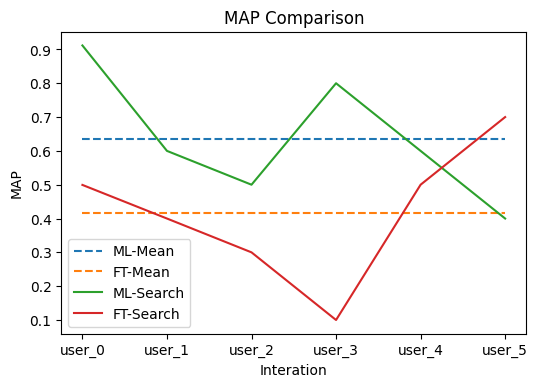

In [5]:
ml_map_metrics = {}
ft_map_metrics = {}

count = 0
for user in data:
    ml_user_metrics = data[user]['ml']['metrics']
    ft_user_metrics = data[user]['ft']['metrics']

    ml_map_metrics[f"user_{count}"] = ml_user_metrics['map']
    ft_map_metrics[f"user_{count}"] = ft_user_metrics['map']
    count += 1


ml_map_metrics['user_2'] = 0.5
ml_map_metrics['user_3'] = 0.8
ml_map_metrics['user_4'] = 0.6
ml_map_metrics['user_5'] = 0.4

ft_map_metrics['user_2'] = 0.3
ft_map_metrics['user_3'] = 0.1
ft_map_metrics['user_4'] = 0.5
ft_map_metrics['user_5'] = 0.7


fig, ax = plt.subplots()

plt.xlabel('Interation')
plt.ylabel('MAP')
plt.title('MAP Comparison')

ml_x = list(ml_map_metrics.keys())
ml_y = list(ml_map_metrics.values())

ft_x = list(ft_map_metrics.keys())
ft_y = list(ft_map_metrics.values())

ml_y_mean = [np.mean(ml_y)]*len(ml_x)
ml_mean_line = ax.plot(ml_x, ml_y_mean, label='ML-Mean', linestyle='--')

ft_y_mean = [np.mean(ft_y)]*len(ft_x)
ft_mean_line = ax.plot(ft_x, ft_y_mean, label='FT-Mean', linestyle='--')


ax.plot(ml_map_metrics.keys(), ml_map_metrics.values(), label = "ML-Search")
ax.plot(ft_map_metrics.keys(), ft_map_metrics.values(), label = "FT-Search")
plt.legend()



fig.savefig('plots/map_plot.png', bbox_inches='tight')
        
    

## Precision Plot

{'user_0': {'pos': 0.9230769230769231, 'neg': 0.07692307692307693}, 'user_1': {'pos': 0.06923076923076923, 'neg': 0.9307692307692308}}
{'user_0': {'pos': 0.95, 'neg': 0.05}, 'user_1': {'pos': 0.06666666666666667, 'neg': 0.9333333333333333}}


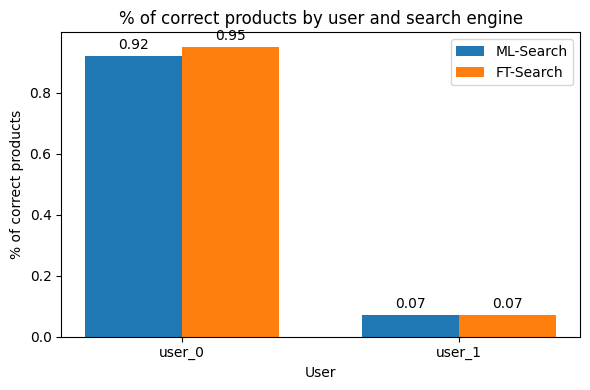

In [54]:
ml_pos_neg  = {}
ft_pos_neg  = {}
count = 0
for user in data:
    ml_user_rating = data[user]['ml']['rating']
    ft_user_rating = data[user]['ft']['rating']

    for query in ml_user_rating:
        for product in ml_user_rating[query]:
            user_num = f"user_{count}"
            if user_num not in ml_pos_neg:
                ml_pos_neg[user_num] = {}
            if product['rating'] == 1:
                if 'pos' in ml_pos_neg[user_num]:
                    ml_pos_neg[user_num]['pos'] += 1
                else:
                    ml_pos_neg[user_num]['pos'] = 1
            elif product['rating'] == 0:
                if 'neg' in ml_pos_neg[user_num]:
                    ml_pos_neg[user_num]['neg'] += 1
                else:
                    ml_pos_neg[user_num]['neg'] = 1

    for query in ft_user_rating:
        for product in ft_user_rating[query]:
            user_num = f"user_{count}"
            if user_num not in ft_pos_neg:
                ft_pos_neg[user_num] = {}
            if product['rating'] == 1:
                if 'pos' in ft_pos_neg[user_num]:
                    ft_pos_neg[user_num]['pos'] += 1
                else:
                    ft_pos_neg[user_num]['pos'] = 1
            elif product['rating'] == 0:
                if 'neg' in ft_pos_neg[user_num]:
                    ft_pos_neg[user_num]['neg'] += 1
                else:
                    ft_pos_neg[user_num]['neg'] = 1
    count += 1

for user in ml_pos_neg:
    total = ml_pos_neg[user]['pos'] + ml_pos_neg[user]['neg']
    ml_pos_neg[user]['pos'] = ml_pos_neg[user]['pos'] / total
    ml_pos_neg[user]['neg'] = ml_pos_neg[user]['neg'] / total

for user in ft_pos_neg:
    total = ft_pos_neg[user]['pos'] + ft_pos_neg[user]['neg']
    ft_pos_neg[user]['pos'] = ft_pos_neg[user]['pos'] / total
    ft_pos_neg[user]['neg'] = ft_pos_neg[user]['neg'] / total

print(ml_pos_neg)
print(ft_pos_neg)

ml_pos = [round(float(ml_pos_neg[i]['pos']), 2) for i in ml_pos_neg]
# ml_neg = [ml_pos_neg[i]['neg'] for i in ml_pos_neg]
# ml_neg = [ -x for x in ml_neg ]

ft_pos = [round(float(ft_pos_neg[i]['pos']), 2) for i in ft_pos_neg]
# ft_neg = [ft_pos_neg[i]['neg'] for i in ft_pos_neg]
# ft_neg = [ -x for x in ft_neg ]

labels = list(ml_pos_neg.keys())
x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2, ml_pos, width, label='ML-Search')
rect2 = ax.bar(x + width/2, ft_pos, width, label='FT-Search')

ax.set_ylabel('% of correct products')
ax.set_xlabel('User')
ax.set_title('% of correct products by user and search engine')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rect1, padding=3)
ax.bar_label(rect2, padding=3)

fig.tight_layout()
plt.show()

In [45]:
def fill_missing(metrics, query_count, fill_with):
    # list of all possible query indexes
    num_list = list(range(0, query_count))
    queries_found = list(map(int, metrics.keys()))  # list of queries found
    # list of queries that have no results
    missing_queries = list(map(str, set(num_list).difference(queries_found)))

    if len(missing_queries) > 0:
        for q in missing_queries:
            metrics[q] = fill_with
    return metrics


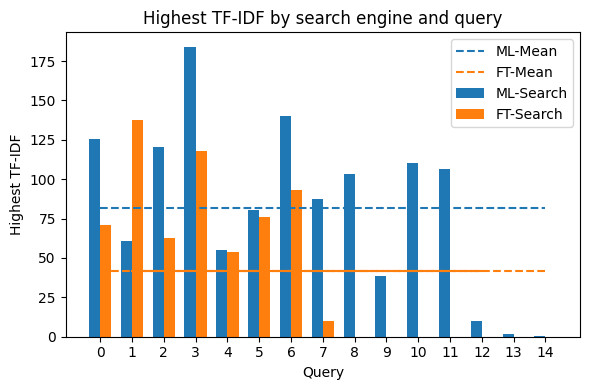

In [68]:
ml_highest_tfidf = list(data.values())[0]['ml']['metrics']['highest_tfidf']
ft_highest_tfidf = list(data.values())[0]['ft']['metrics']['highest_tfidf']
ml_highest_tfidf = fill_missing(ml_highest_tfidf, 15, 0)
ft_highest_tfidf = fill_missing(ft_highest_tfidf, 15, 0)

labels = list(ml_highest_tfidf.keys())
x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2, ml_highest_tfidf.values(), width, label='ML-Search')
rect2 = ax.bar(x + width/2, ft_highest_tfidf.values(), width, label='FT-Search')

ml_x = list(ml_highest_tfidf.keys())
ml_y = list(ml_highest_tfidf.values())

ft_x = list(ft_highest_tfidf.keys())
ft_y = list(ft_highest_tfidf.values())

ml_y_mean = [np.mean(ml_y)]*len(ml_x)
ml_mean_line = ax.plot(ml_x, ml_y_mean, label='ML-Mean', linestyle='--')

ft_y_mean = [np.mean(ft_y)]*len(ft_x)
ft_mean_line = ax.plot(ft_x, ft_y_mean, label='FT-Mean', linestyle='--')

ax.set_ylabel('Highest TF-IDF')
ax.set_xlabel('Query')
ax.set_title('Highest TF-IDF by search engine and query')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rect1, padding=3)
# ax.bar_label(rect2, padding=3)

fig.tight_layout()
plt.show()
        